Social network advertising, also social media targeting, is a group of terms that are used to describe forms of online advertising/digital marketing that focus on social networking services. One of the major benefits of this type of advertising is that advertisers can take advantage of the users' demographic information and target their ads appropriately.

Social media targeting combines current targeting options (such as geotargeting, behavioral targeting, socio-psychographic targeting, etc.), to make detailed target group identification possible. With social media targeting, advertisements are distributed to users based on information gathered from target group profiles.

Social network advertising is not necessarily the same as social media targeting. Social media targeting is a method of optimizing social media advertising by using profile data to deliver advertisements directly to individual users. Social network advertising refers to the process of matching social network users to target groups that have been specified by the advertiser. Social media advertising involves creating content on social media platforms, engaging with followers, and running social media advertisements.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Social_network_advertising)

For this assignment, we will take a look at how Social Network pick who to advertise using k-Nearest Neighbor algorithm. We will leverage the [Social Network Ads dataset](https://www.kaggle.com/rakeshrau/social-network-ads).

First, let's import the data

# Learning Objectives
- Define basic terminology of machine learning.
- Describe a typical machine learning modeling process.
- Demonstrate the ability to use K-Nearest Neighbor algorithm.
- Demonstrate the ability to tweak K-Nearest Neighbor algorithm.
- Demonstrate the ability to determine the accuracy of a model.

In [22]:
import numpy as np
import pandas as pd

SNA = pd.read_csv('./Social_Network_Ads.csv')

Question 1: Print the top 10 rows of the dataset

In [23]:
# This will display the first 10 rows of the dataset.
display(SNA.head(n=10))

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Question 1.2: Drop the User Id column from the SNA dataframe using [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method

In [24]:
SNA_edited = SNA.drop('User ID', axis=1)
display(SNA_edited.head(n=10))

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


Question 2.1: Within the Gender column, replace the text Male and Female with 0 and 1 respectively. You can use [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method.

In [25]:
# Converting directly to integer results in deprecation warning. Converting to string first,
# then to integer to avoid the warning.
SNA_edited.replace(['Male', 'Female'], ['0', '1'], inplace=True)
SNA_edited['Gender'] = pd.to_numeric(SNA_edited['Gender'], downcast='integer')


Question 2.2: Check if successful by printing top 10 rows

In [26]:
display(SNA_edited.head(n=10))


,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
5,0,27,58000,0
6,1,27,84000,0
7,1,32,150000,1
8,0,25,33000,0
9,1,35,65000,0


As part of any machine learning problem, we need to explore the data and perform exploratory data analysis. For the next set of questions, we will be using [seaborn](https://seaborn.pydata.org/index.html) library for visualization.

Question 3.1: Using Seaboard [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), create three pairwise scatter plots using Purchased column as hue for the following pairs:
1. Age & EstimatedSalary
2. Age & Gender
3. Gender & EstimatedSalary

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

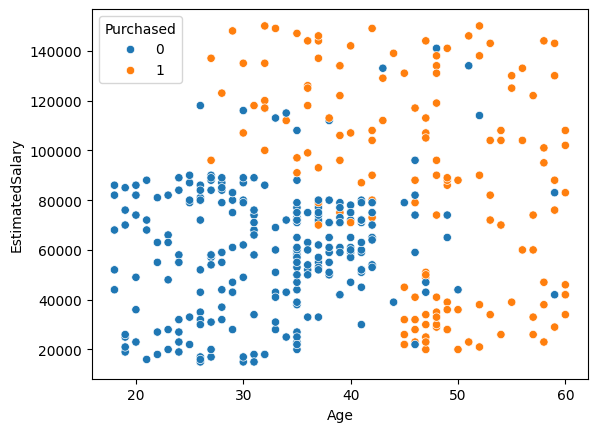

In [29]:
import seaborn as sns
sns.scatterplot(data=SNA_edited, x="Age", y="EstimatedSalary", hue="Purchased")


<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

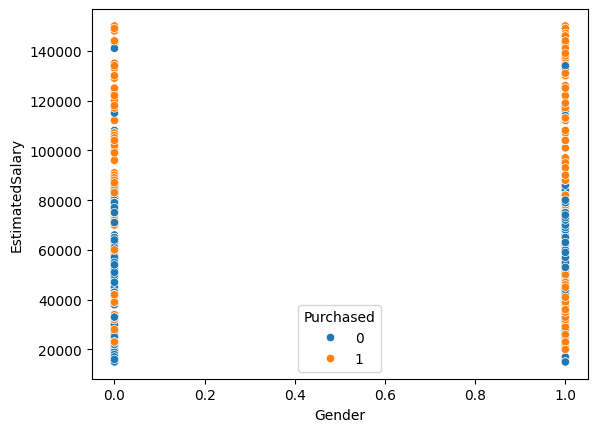

In [30]:

sns.scatterplot(data=SNA_edited, x="Gender", y="EstimatedSalary", hue="Purchased")


<Axes: xlabel='Age', ylabel='Gender'>

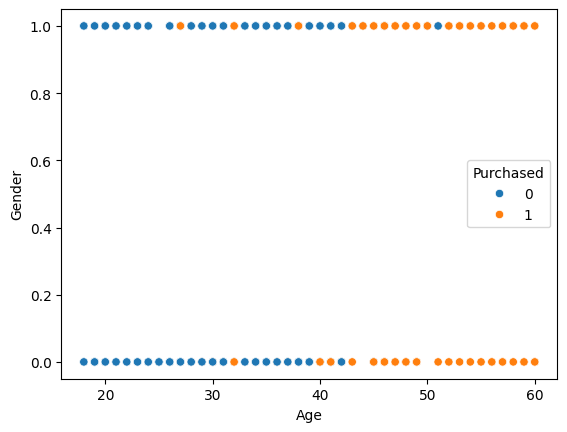

In [28]:
sns.scatterplot(data=SNA_edited, x="Age", y="Gender", hue="Purchased")


Question 3.2: Based on the above plots, which feature(s) can be best used to determine if a person will purchase an item based on Ad? 

Age & EstimatedSalary look like the best candidates - it should be pretty easy to separate the two classes based on these two features. Looking at the scatterplot we can even roughly see where the division would go.

Question 3.3: Use histogram plots to validate your answer. Set the Hue to be 'Purchased'

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

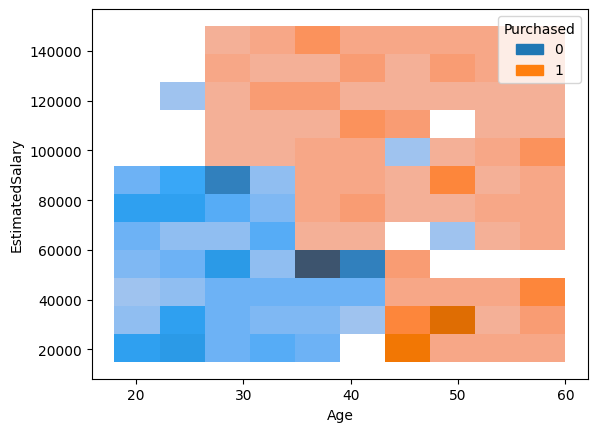

In [32]:
sns.histplot(data=SNA_edited, x="Age", y="EstimatedSalary", hue="Purchased")

<Axes: xlabel='EstimatedSalary', ylabel='Gender'>

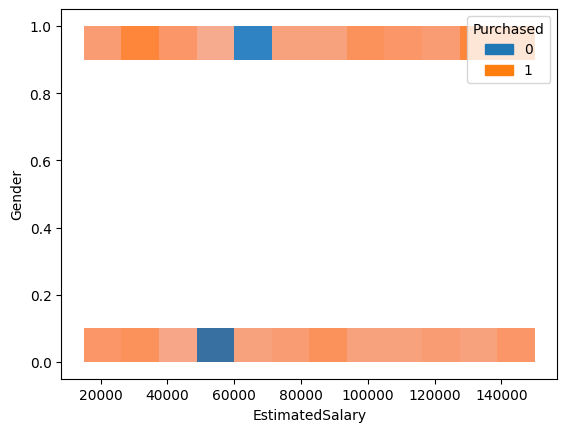

In [35]:
sns.histplot(data=SNA_edited, y="Gender", x="EstimatedSalary", hue="Purchased")


<Axes: xlabel='Age', ylabel='Gender'>

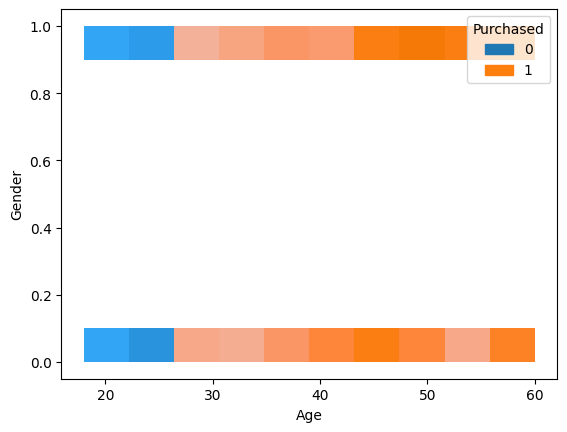

In [36]:
sns.histplot(data=SNA_edited, x="Age", y="Gender", hue="Purchased")


Question 4: Now that we have performed data exploration, lets experiment with k-NN algorithm. But first, we need to split the data into training and testing set. To perform this task, you can use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a 70/30 split for training and test data respectively.

In [122]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(SNA_edited, train_size=0.7)
print(len(train))
display(train.head(n=10))
print(len(test))
display(test.head(n=10))

280


,Gender,Age,EstimatedSalary,Purchased
240,0,42,149000,1
13,0,32,18000,0
371,0,60,83000,1
312,1,38,50000,0
227,0,56,133000,1
228,1,40,72000,0
272,0,60,42000,1
148,0,29,61000,0
251,0,37,52000,0
339,0,39,122000,1


120


,Gender,Age,EstimatedSalary,Purchased
258,1,58,95000,1
182,1,32,117000,1
250,1,44,39000,0
168,0,29,148000,1
43,0,30,15000,0
299,0,46,117000,1
11,1,26,52000,0
257,0,40,57000,0
290,0,39,134000,1
197,1,20,36000,0


Question 5.1: Using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), write a k-NN classifier with n=2

In [123]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(train, train['Purchased'])

KNeighborsClassifier(n_neighbors=2)

Using [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), evaluate and print the classifier output

In [124]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = neigh.predict(test)
print(classification_report(test['Purchased'], y_pred))
print(confusion_matrix(test['Purchased'], y_pred))
print(accuracy_score(test['Purchased'], y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        74
           1       0.76      0.61      0.67        46

    accuracy                           0.78       120
   macro avg       0.77      0.74      0.75       120
weighted avg       0.77      0.78      0.77       120

[[65  9]
 [18 28]]
0.775


It looks like we only had 3 false negatives and 28 false positives. This is a pretty good result, but we can try to improve it by tweaking the n_neighbors parameter.

Question 5.2: What happens when you increase the value of k from 2 to 10. Iterate over k from 2 to 10, build and evaluate the different KNeighborsClassifier

In [125]:
accuracies_with_gender = []
for i in range(2, 20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train, train['Purchased'])
    y_pred = neigh.predict(test)
    acc = accuracy_score(test['Purchased'], y_pred)
    accuracies_with_gender.append(acc)
    print(f'Accuracy for {i} neighbors: {acc}')
    print(confusion_matrix(test['Purchased'], y_pred))

Accuracy for 2 neighbors: 0.775
[[65  9]
 [18 28]]
Accuracy for 3 neighbors: 0.8
[[59 15]
 [ 9 37]]
Accuracy for 4 neighbors: 0.7666666666666667
[[64 10]
 [18 28]]
Accuracy for 5 neighbors: 0.8166666666666667
[[63 11]
 [11 35]]
Accuracy for 6 neighbors: 0.8333333333333334
[[70  4]
 [16 30]]
Accuracy for 7 neighbors: 0.8083333333333333
[[65  9]
 [14 32]]
Accuracy for 8 neighbors: 0.8166666666666667
[[67  7]
 [15 31]]
Accuracy for 9 neighbors: 0.7833333333333333
[[62 12]
 [14 32]]
Accuracy for 10 neighbors: 0.8083333333333333
[[68  6]
 [17 29]]
Accuracy for 11 neighbors: 0.8333333333333334
[[66  8]
 [12 34]]
Accuracy for 12 neighbors: 0.85
[[68  6]
 [12 34]]
Accuracy for 13 neighbors: 0.825
[[62 12]
 [ 9 37]]
Accuracy for 14 neighbors: 0.8416666666666667
[[67  7]
 [12 34]]
Accuracy for 15 neighbors: 0.8416666666666667
[[65  9]
 [10 36]]
Accuracy for 16 neighbors: 0.8333333333333334
[[67  7]
 [13 33]]
Accuracy for 17 neighbors: 0.8416666666666667
[[67  7]
 [12 34]]
Accuracy for 18 neighbo

Question 5.3: What happened to the accuracy of the classifier at k>9 and why?

Accuracy decreased due to overfitting. Upon closer look it seems like the number of false positives increased significantly. This is a sign of overfitting.

Question 6.1: Now try eliminating one of the features (Eender) from the dataset

In [126]:
SNA_edited_without_gender = SNA_edited.drop('Gender', axis=1)
train, test = train_test_split(SNA_edited_without_gender, train_size=0.7)

Question 6.2: Perform the same task from question 5.2 with the updated data

In [127]:
accuracies = []
for i in range(2, 20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train, train['Purchased'])
    y_pred = neigh.predict(test)
    accuracies.append(accuracy_score(test["Purchased"], y_pred))
    print(f'Accuracy for {i} neighbors: {accuracy_score(test["Purchased"], y_pred)}')
    print(confusion_matrix(test['Purchased'], y_pred))

Accuracy for 2 neighbors: 0.7666666666666667
[[71  2]
 [26 21]]
Accuracy for 3 neighbors: 0.8166666666666667
[[66  7]
 [15 32]]
Accuracy for 4 neighbors: 0.7833333333333333
[[67  6]
 [20 27]]
Accuracy for 5 neighbors: 0.8083333333333333
[[65  8]
 [15 32]]
Accuracy for 6 neighbors: 0.7666666666666667
[[67  6]
 [22 25]]
Accuracy for 7 neighbors: 0.7666666666666667
[[64  9]
 [19 28]]
Accuracy for 8 neighbors: 0.775
[[66  7]
 [20 27]]
Accuracy for 9 neighbors: 0.7583333333333333
[[64  9]
 [20 27]]
Accuracy for 10 neighbors: 0.7833333333333333
[[67  6]
 [20 27]]
Accuracy for 11 neighbors: 0.7666666666666667
[[65  8]
 [20 27]]
Accuracy for 12 neighbors: 0.7833333333333333
[[68  5]
 [21 26]]
Accuracy for 13 neighbors: 0.8
[[67  6]
 [18 29]]
Accuracy for 14 neighbors: 0.7833333333333333
[[68  5]
 [21 26]]
Accuracy for 15 neighbors: 0.7833333333333333
[[68  5]
 [21 26]]
Accuracy for 16 neighbors: 0.775
[[68  5]
 [22 25]]
Accuracy for 17 neighbors: 0.7916666666666666
[[68  5]
 [20 27]]
Accuracy 

Question 6.3: What happened to the results? What's your conclusion? Plot accuracy vs k.

In general, it seems that the accuracy increases, but it doesn't seem significant.

<Axes: >

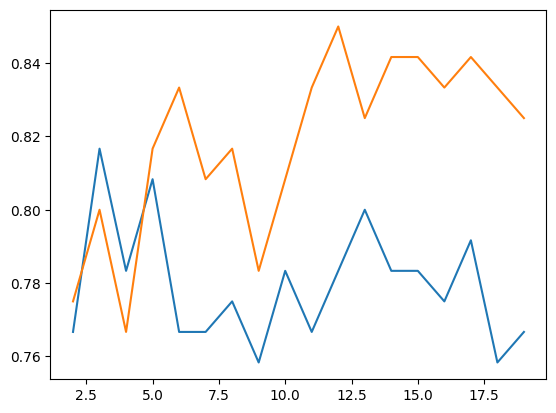

In [128]:
sns.lineplot(x=range(2, 20), y=accuracies)
sns.lineplot(x=range(2, 20), y=accuracies_with_gender)

Question 7: Repeat steps 6.1-6.3 with another distance metric. Comment on what happens to the results?

In [136]:
for i in range(2, 20):
    neigh = KNeighborsClassifier(n_neighbors=i, metric='cosine')
    neigh.fit(train, train['Purchased'])
    y_pred = neigh.predict(test)
    print(f'Accuracy for {i} neighbors: {accuracy_score(test["Purchased"], y_pred)}')
    print(confusion_matrix(test['Purchased'], y_pred))

Accuracy for 2 neighbors: 0.8416666666666667
[[69  4]
 [15 32]]
Accuracy for 3 neighbors: 0.825
[[64  9]
 [12 35]]
Accuracy for 4 neighbors: 0.7833333333333333
[[69  4]
 [22 25]]
Accuracy for 5 neighbors: 0.775
[[65  8]
 [19 28]]
Accuracy for 6 neighbors: 0.75
[[69  4]
 [26 21]]
Accuracy for 7 neighbors: 0.7833333333333333
[[65  8]
 [18 29]]
Accuracy for 8 neighbors: 0.75
[[67  6]
 [24 23]]
Accuracy for 9 neighbors: 0.75
[[63 10]
 [20 27]]
Accuracy for 10 neighbors: 0.725
[[66  7]
 [26 21]]
Accuracy for 11 neighbors: 0.7333333333333333
[[64  9]
 [23 24]]
Accuracy for 12 neighbors: 0.6833333333333333
[[65  8]
 [30 17]]
Accuracy for 13 neighbors: 0.6916666666666667
[[65  8]
 [29 18]]
Accuracy for 14 neighbors: 0.675
[[66  7]
 [32 15]]
Accuracy for 15 neighbors: 0.6833333333333333
[[61 12]
 [26 21]]
Accuracy for 16 neighbors: 0.6833333333333333
[[63 10]
 [28 19]]
Accuracy for 17 neighbors: 0.6833333333333333
[[60 13]
 [25 22]]
Accuracy for 18 neighbors: 0.7
[[65  8]
 [28 19]]
Accuracy for

# Conclusion

It seems that the default distance metric (Minkowski) is the best choice for this dataset. It's also worth noting that the accuracy of the classifier is pretty high, which is a good sign.

Changing the distance metric to cosine distance, the accuracy of the classifier started decreasing visibly after k=5. This is a sign of overfitting, much clearer than in the case of Minkowski distance (defaulting to the Euclidean distance). This is a good example of how the choice of distance metric can affect the performance of the classifier.